In [1]:
video_path = "../../.cache/FULL MATCH： Portugal v Spain ｜ 2018 FIFA World Cup [OFbyNU6UQQs].webm"

In [ ]:
import pixeltable as pxt
from pixeltable.iterators import FrameIterator
import time

video_table = pxt.create_table('videos', {'video': pxt.Video})


st = time.time()
video_table.insert([{'video': video_path}], print_stats=True)
en = time.time() - st
print(f"Time to insert video: {en:.2f} seconds")

In [17]:
video_table = pxt.get_table('videos')

In [18]:
# Extract audio from video
# This will create a new column 'audio' in the table
from pixeltable.functions.video import extract_audio
from pixeltable.functions.audio import get_metadata

video_table.add_computed_column(
    audio=extract_audio(video_table.video, format='mp3'), if_exists="ignore"
)
video_table.add_computed_column(
    metadata=get_metadata(video_table.audio)
)
video_table.show()


Error: Duplicate column name: 'metadata'

100%|███████████████████████████████████████| 139M/139M [00:10<00:00, 13.3MiB/s]
/Users/razvantalexandru/Documents/NeuralBits/multimodal-agents-course/ingestion/.venv/lib/python3.11/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Added 1 column value with 0 errors.


video,transcription_text
,"the game. Portugal regularly used a 4-4-2 formation in qualifying, where the gay dash plays just behind Ronaldo, or alongside him, we will just have to wait and see. Portugal have played in more world cups with Cristiano Ronaldo than without. They are fourth with their first-year-old, Jean-Luca Rocket, from Italy is in charge to Italian assistance. Ra'Youshin Sato from Japan is the fourth official. And back in Moscow, there is the line-up of VAR officials led by Massimiliano Irati from Ital ...... been given the other way. But this may well be full-time. The first one is for the first one. Spain and Portugal take a point each after an absorbing, enthralling, exciting, exquisite encounter in which Cristiano Ronaldo scored a hat-trick. Diego Costa with two. And Natchett with another for Spain. In a match that swung both ways. But there's no doubt about it. Portugal are the happier to take a point from their opening fixture in Group B. What a night in Sochi. Portugal three. Spain three."

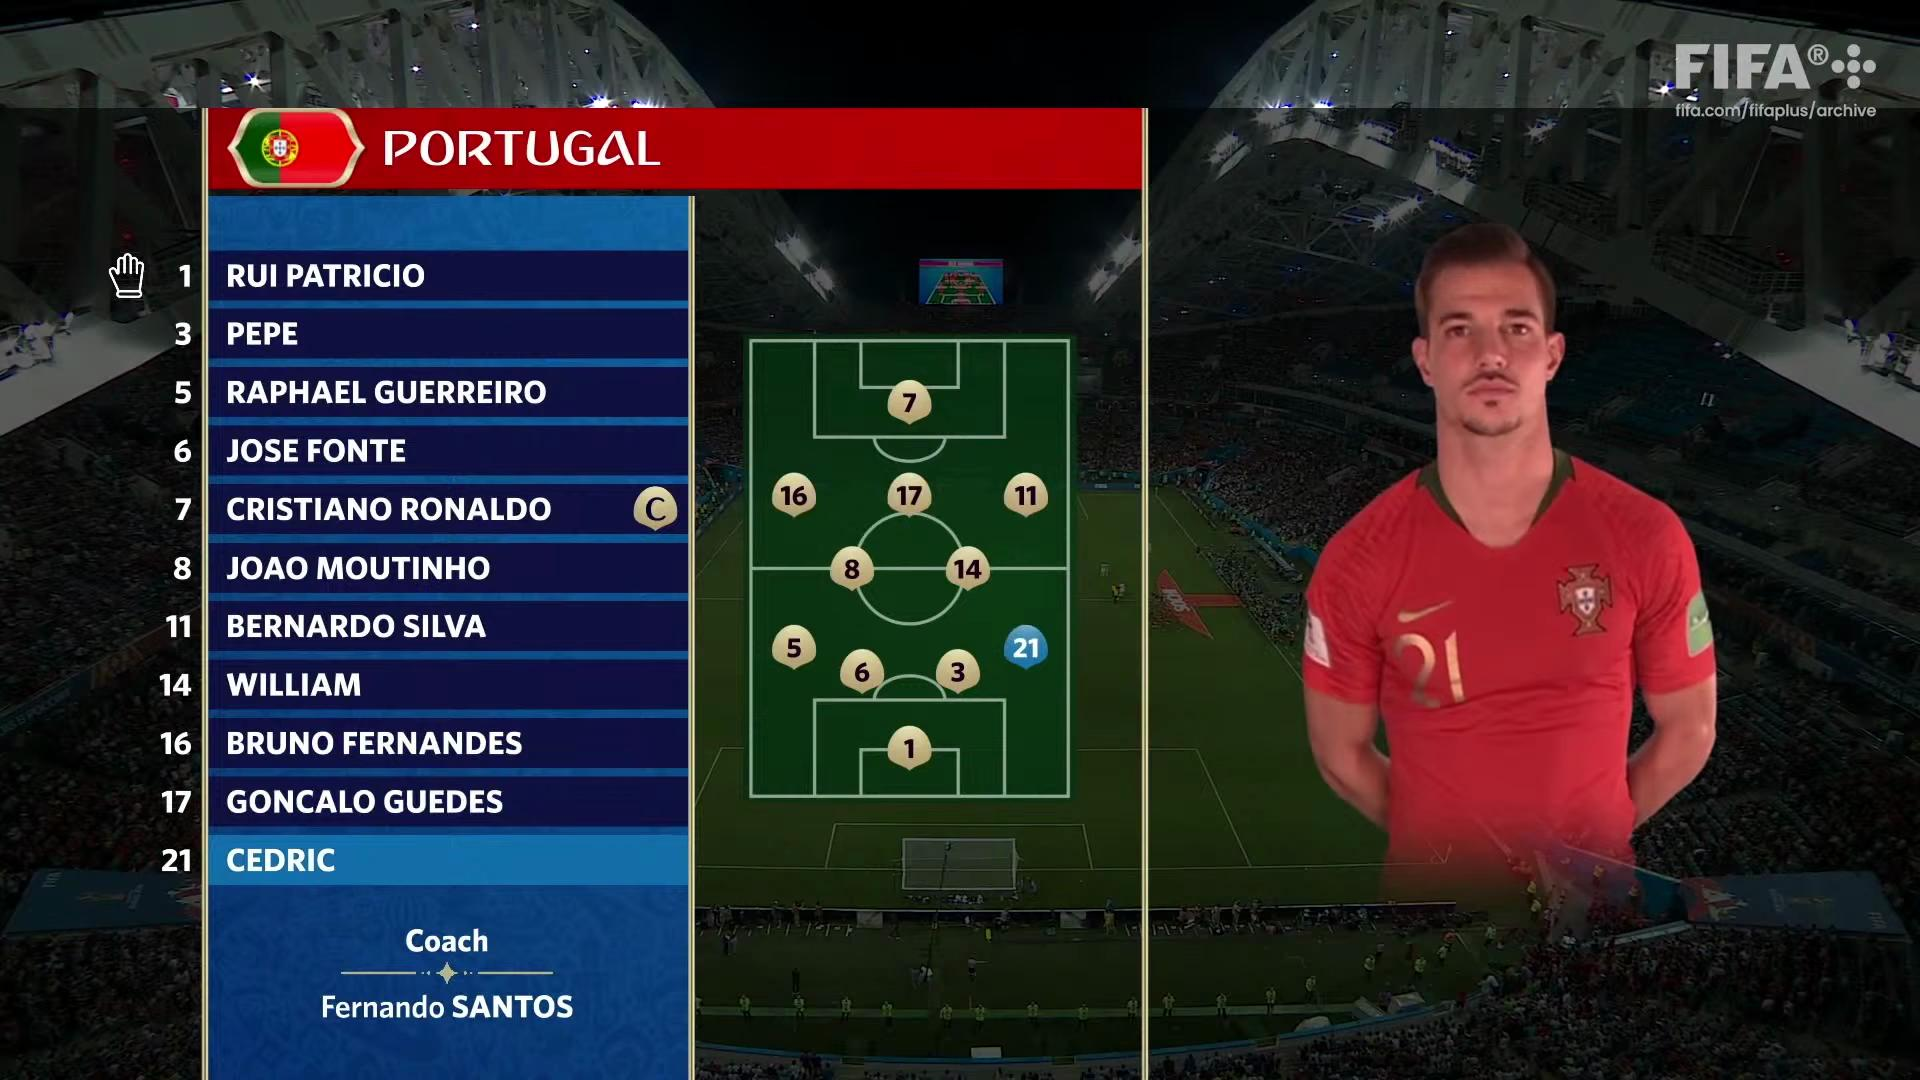

In [19]:
# Create transcripts from audio
from pixeltable.functions import whisper

video_table.add_computed_column(
    transcription=whisper.transcribe(
        audio=video_table.audio,
        model='base.en'
    )
)

video_table.select(
    video_table.video,
    video_table.transcription.text
).show()

video  \
0  /Users/razvantalexandru/Documents/NeuralBits/m...   

                                               audio  \
0  /Users/razvantalexandru/.pixeltable/media/a17e...   

                                            metadata  \
0  {'size': 95811692, 'streams': [{'type': 'audio...   

                                       transcription  
0  {'text': ' the game. Portugal regularly used a...
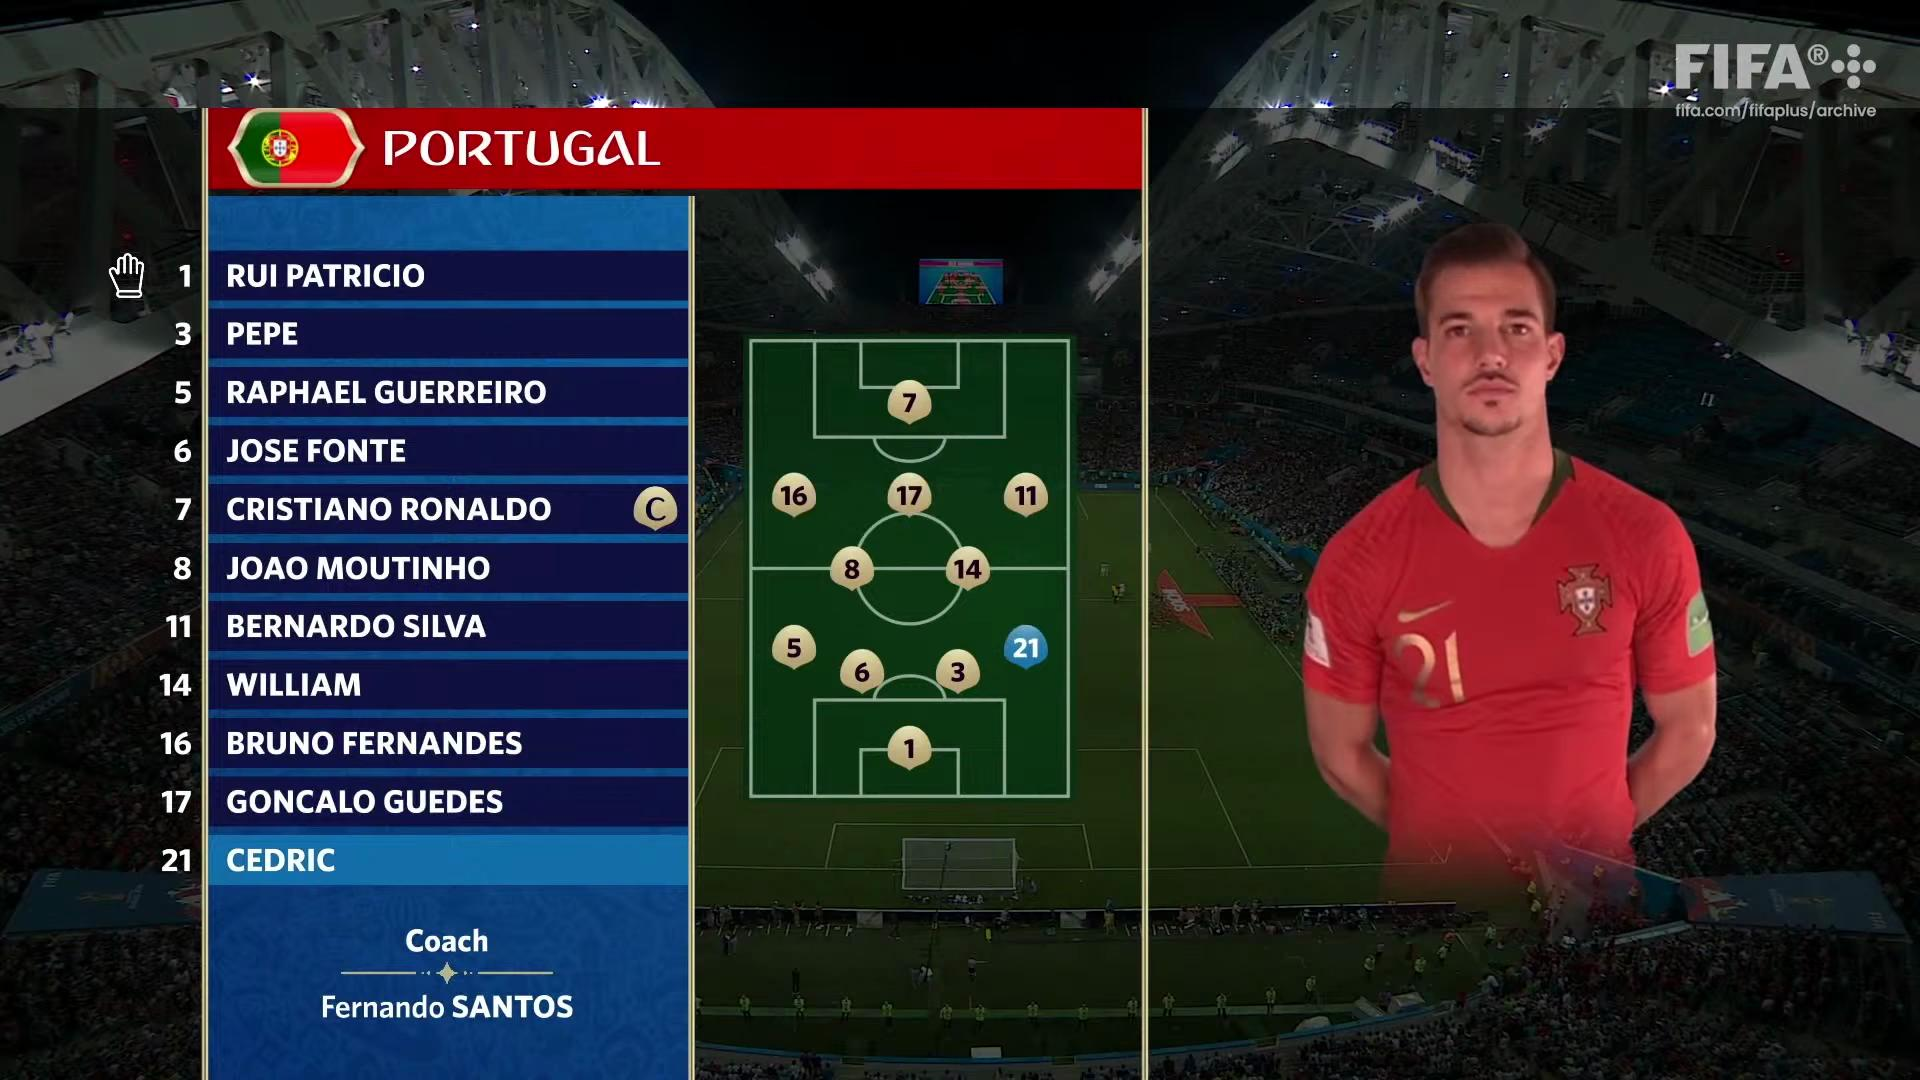

In [ ]:
video_table.select(
    video_table.video,
    video_table.transcription,
    video_table.metadata.duration
).show()



In [27]:
from pixeltable.iterators.string import StringSplitter
sentences_view = pxt.create_view(
    'demo.sentences_view',
    video_table,
    iterator=StringSplitter.create(
        text=video_table.transcription.text,
        separators='sentence'
    )
)

/Users/razvantalexandru/Documents/NeuralBits/multimodal-agents-course/ingestion/.venv/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Inserting rows into `sentences_view`: 1117 rows [00:00, 33463.36 rows/s]
Created view `sentences_view` with 1117 rows, 0 exceptions.


In [35]:
frames_view = pxt.create_view(
    'frames_view',
    video_table,
    iterator=FrameIterator.create(
        video=video_table.video,
        fps=1,
    )
)

Error: Frame 120 is missing from the video (video file is corrupt)

In [42]:
from pixeltable.iterators import FrameIterator
from pixeltable.functions.video import extract_audio
from pixeltable.functions.audio import get_metadata
from pixeltable.functions import whisper



pxt.create_dir('video_tutorial', if_exists='replace_force')

vpath = "/Users/razvantalexandru/Documents/NeuralBits/multimodal-agents-course/.cache/portugal_vs_spain_15m.mp4"

vtable = pxt.create_table(
    'video_tutorial.videos',
    {'video': pxt.Video}
)



Created directory 'video_tutorial'.
Created table `videos`.


video
""

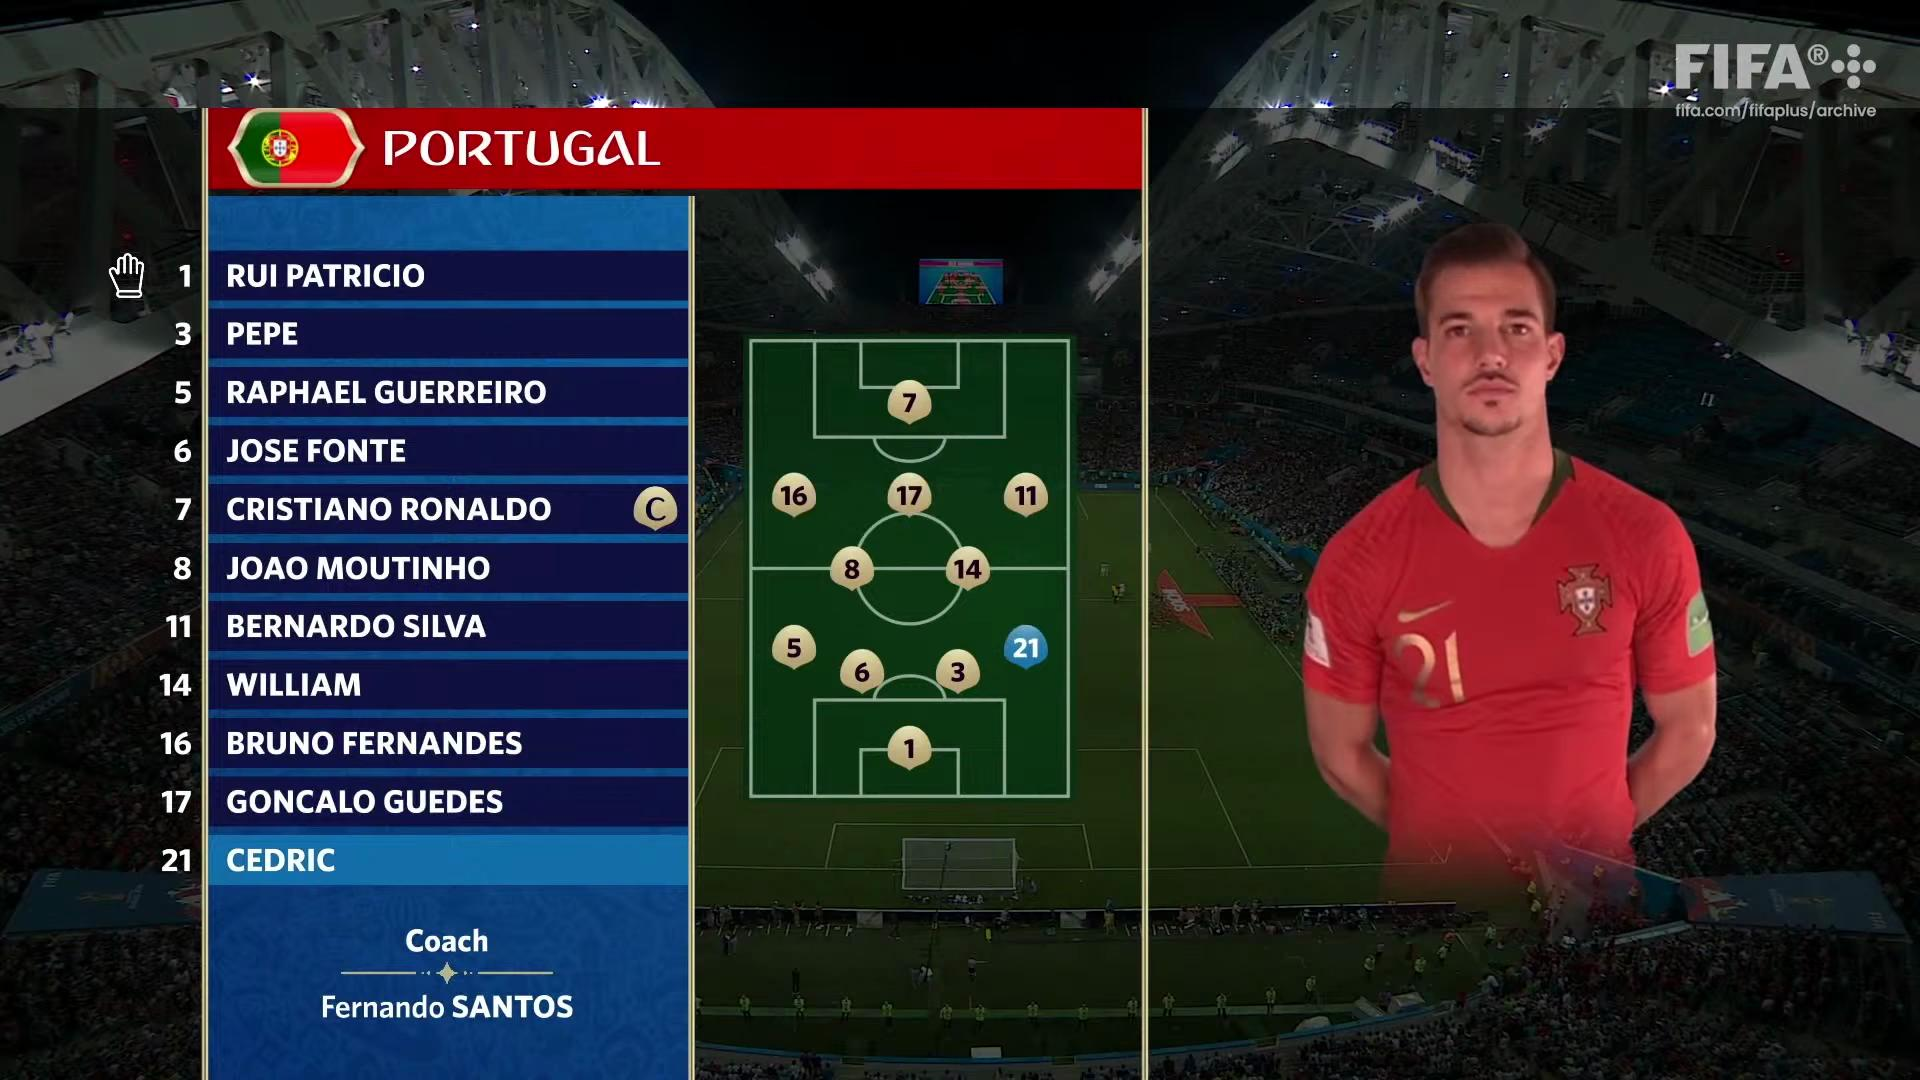

In [49]:
# vtable.insert([{'video': vpath}])
vtable.show()


In [51]:
frames_view = pxt.create_view(
    'frames', vtable, iterator=FrameIterator.create(video=vtable.video))


Error: Frame 3 is missing from the video (video file is corrupt)

In [2]:
import pixeltable as pxt
video_table = pxt.get_table("demo.videos")

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/razvantalexandru/.pixeltable/pgdata


In [4]:
from pixeltable.iterators.string import StringSplitter
sentences_view = pxt.create_view(
    'demo.sentences_view',
    video_table,
    iterator=StringSplitter.create(
        text=video_table.transcription.text,
        separators='sentence'
    )
)

/Users/razvantalexandru/Documents/NeuralBits/multimodal-agents-course/ingestion/.venv/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Inserting rows into `sentences_view`: 153 rows [00:00, 17121.89 rows/s]
Created view `sentences_view` with 153 rows, 0 exceptions.


In [3]:
x = pxt.get_table('frames_view').collect().to_pandas()

In [8]:
x['transcription'].to_list()[:1]

[{'text': " the game. Portugal regularly used a 4-4-2 formation in qualifying, where the gay dash plays just behind Ronaldo, or alongside him, we will just have to wait and see. Portugal have played in more world cups with Cristiano Ronaldo than without. They are fourth with their first-year-old, Jean-Luca Rocket, from Italy is in charge to Italian assistance. Ra'Youshin Sato from Japan is the fourth official. And back in Moscow, there is the line-up of VAR officials led by Massimiliano Irati from Italy. David DeHaia was an ever-presenting qualifying. Many of this Spanish team we know would have started, no matter who the coach is. Sergio Puskats is arguably Spain's most important player. Andres Iniesta scored the extra-time winner when Spain beat the Netherlands in the 2010 World Cup final. Sergio Ramos-Captain's Spain, new coach Fernando Iero, was Ramos's hero when he was growing up. And he was a great player. And he was a great player. MANO the first time in the last October by beat

In [17]:
x[['pos', 'frame_idx', 'video', 'transcription']][:20].to_csv('frames.csv', index=False)